In [1]:
import brightway2 as bw
from premise import *
import pandas as pd

In [2]:
bw.projects.set_current("premise")

In [3]:
ndb = NewDatabase(
        scenarios = [
            {"model":"image", "pathway":"SSP2-RCP19", "year":2025, "exclude": ["update_two_wheelers", "update_buses", "update_cars"]},
            {"model":"image", "pathway":"SSP2-RCP19", "year":2030, "exclude": ["update_two_wheelers", "update_buses", "update_cars"]},
            {"model":"image", "pathway":"SSP2-RCP19", "year":2035, "exclude": ["update_two_wheelers", "update_buses", "update_cars"]},
            {"model":"image", "pathway":"SSP2-RCP19", "year":2040, "exclude": ["update_two_wheelers", "update_buses", "update_cars"]},
            {"model":"image", "pathway":"SSP2-RCP19", "year":2045, "exclude": ["update_two_wheelers", "update_buses", "update_cars"]},
            {"model":"image", "pathway":"SSP2-RCP19", "year":2050, "exclude": ["update_two_wheelers", "update_buses", "update_cars"]},
            #{"model":"image", "pathway":"SSP2-RCP26", "year":2050, "exclude": ["update_two_wheelers", "update_buses", "update_cars"]},
            #{"model":"image", "pathway":"SSP2-RCP26", "year":2036, "exclude": ["update_two_wheelers", "update_buses", "update_cars"]},
        ],        
        source_db="ecoinvent 3.8 cutoff",
        source_version="3.8",
        key='tUePmX_S5B8ieZkkM7WUU2CnO8SmShwmAeWK9x2rTFo=',
        #custom_scenario=[
        #    {
        #        "inventories": "",
        #        "scenario data": r"example.xlsx",
        #        "config": r"config.yaml"
        #    }
        #]
    )

+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
|                                                                  |
| Within your bw2 project:                                         |
| from premise_gwp import add_premise_gwp                          |
| add_premise_gwp()                                                |
+------------------------------------------------------------------+

////////////////////// EXTRACTING SOURCE DATABASE //////////////////
Done!

//////////////////// IMPOR

<AxesSubplot:xlabel='year'>

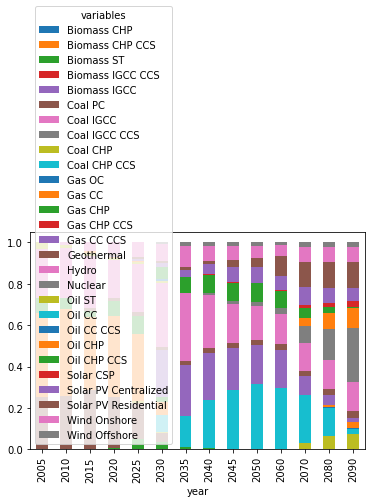

In [16]:
ndb.iam_data.electricity_markets.sel(region="TUR").mean(dim="scenario").to_dataframe("val").unstack()["val"].T.plot(kind="bar", stacked=True)

In [4]:
ndb.update_electricity()


///////////////////////////// ELECTRICITY //////////////////////////
Creating high voltage markets...
Creating medium voltage markets...
distr_loss_exc s.exchange               c.prod_name                     market group for electricity, high voltage
                         c.prod_prod                                      electricity, high voltage
                         c.prod_loc                                                             BRA
                         c.cons_name                   market group for electricity, medium voltage
                         c.cons_prod                                    electricity, medium voltage
                         c.cons_loc                                                             BRA
                         c.unit                                                       kilowatt hour
                         c.type                                                        technosphere
                         c.prod_key            

In [5]:
ndb.write_db_to_brightway(name=["test24", "test25"])

Write new database(s) to Brightway2.
20976 datasets
659366 exchanges
0 unlinked exchanges
  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:19


Title: Writing activities to SQLite3 database:
  Started: 05/05/2022 08:00:43
  Finished: 05/05/2022 08:01:02
  Total time elapsed: 00:00:19
  CPU %: 90.10
  Memory %: 12.36
Created database: test24
20976 datasets
659366 exchanges
0 unlinked exchanges
  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:19


Title: Writing activities to SQLite3 database:
  Started: 05/05/2022 08:04:48
  Finished: 05/05/2022 08:05:07
  Total time elapsed: 00:00:19
  CPU %: 90.30
  Memory %: 13.53
Created database: test25


In [5]:
ndb.write_superstructure_db_to_brightway(name="test23")

Scenario difference file exported to /Users/romain/GitHub/premise/premise/data/export/scenario diff files/test23.xlsx!
Exporting test23...


/Users/romain/GitHub/premise/premise/utils.py:516: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.loc[:, (s.ecoinvent, c.comment)] = df.loc[:, col_tuples].sum(axis=1)


21075 datasets
664235 exchanges
0 unlinked exchanges
  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:18


Title: Writing activities to SQLite3 database:
  Started: 05/04/2022 21:54:10
  Finished: 05/04/2022 21:54:29
  Total time elapsed: 00:00:18
  CPU %: 90.80
  Memory %: 11.36
Created database: test23
Done!


In [ ]:
%debug

> /opt/homebrew/Caskroom/miniforge/base/envs/premise/lib/python3.9/site-packages/wurst/searching.py(81)reference_product()
     79     ]
     80     if not excs:
---> 81         raise NoResults("No suitable production exchanges found")
     82     elif len(excs) > 1:
     83         raise MultipleResults("Multiple production exchanges found")



In [6]:
from premise.utils import s, c

In [8]:
ndb.database.loc[
    (ndb.database[(s.exchange, c.prod_name)]=="heat and power co-generation, wood chips, 6667 kW, state-of-the-art 2014")
    & (ndb.database[(s.exchange, c.type)]=="production")
    & (ndb.database[(s.exchange, c.unit)]=="kilowatt hour")
    & (ndb.database[(s.exchange, c.cons_loc)]=="BRA"),
    ('image::SSP2-Base::2050', c.efficiency)
].unique()

array([0.15441176])

In [13]:
ndb.database.columns

MultiIndex([(              s.exchange,            c.prod_name),
            (              s.exchange,            c.prod_prod),
            (              s.exchange,             c.prod_loc),
            (              s.exchange,            c.cons_name),
            (              s.exchange,            c.cons_prod),
            (              s.exchange,             c.cons_loc),
            (              s.exchange,                 c.unit),
            (              s.exchange,                 c.type),
            (              s.exchange,             c.prod_key),
            (              s.exchange,             c.cons_key),
            (              s.exchange,              c.exc_key),
            (             s.ecoinvent,        c.cons_prod_vol),
            (             s.ecoinvent,               c.amount),
            (             s.ecoinvent,           c.efficiency),
            (             s.ecoinvent,              c.comment),
            (                   s.tag,  

In [12]:
ndb.database.tail()

s.exchange  \
                                              c.prod_name   
629963                         market for inverter, 2.5kW   
629964  photovoltaics, electric installation for 3kWp ...   
629965        market for photovoltaic laminate, ribbon-Si   
629966  market for photovoltaic module, building-integ...   
629967  photovoltaic slanted-roof installation, 3kWp, ...   

                                                                      \
                                              c.prod_prod c.prod_loc   
629963                                    inverter, 2.5kW        GLO   
629964  photovoltaics, electric installation for 3kWp ...         CH   
629965                   photovoltaic laminate, ribbon-Si        GLO   
629966  photovoltaic module, building-integrated, for ...        GLO   
629967  photovoltaic slanted-roof installation, 3kWp, ...         CH   

                                                           \
                                              c.cons_name   
629963  photovoltaic slanted-roof installation, 3kWp, ...   
629964  photovoltaic slanted-roof installation, 3kWp, ...   
629965  photovoltaic slanted-roof installation, 3kWp, ...   
629966  photovoltaic slanted-roof installation, 3kWp, ...   
629967  photovoltaic slanted-roof installation, 3kWp, ...   

                                                                      \
                                              c.cons_prod c.cons_loc   
629963  photovoltaic slanted-roof installation, 3kWp, ...         CH   
629964  photovoltaic slanted-roof installation, 3kWp, ...         CH   
629965  photovoltaic slanted-roof installation, 3kWp, ...         CH   
629966  photovoltaic slanted-roof installation, 3kWp, ...         CH   
629967  photovoltaic slanted-roof installation, 3kWp, ...         CH   

                                                                   \
              c.unit        c.type                     c.prod_key   
629963          unit  technosphere  24634179011591561868099835589   
629964          unit  technosphere  40576214587321759850157155776   
629965  square meter  technosphere  73373774994741211143944001316   
629966  square meter  technosphere  73473719675998917663458228618   
629967          unit    production   2017092412685672677511621266   

                                      ...       s.tag            \
                          c.cons_key  ... Oil CHP CCS Solar CSP   
629963  2017092412685672677511621266  ...       False     False   
629964  2017092412685672677511621266  ...       False     False   
629965  2017092412685672677511621266  ...       False     False   
629966  2017092412685672677511621266  ...       False     False   
629967  2017092412685672677511621266  ...       False     False   

                                                                             \
       Solar PV Centralized Solar PV Residential Wind Onshore Wind Offshore   
629963                False                False        False         False   
629964                False                False        False         False   
629965                False                False        False         False   
629966                False                False        False         False   
629967                False                False        False         False   

       image::SSP2-Base::2050                                  
              c.cons_prod_vol c.amount c.efficiency c.comment  
629963                    NaN      NaN          NaN            
629964                    NaN      NaN          NaN            
629965                    NaN      NaN          NaN            
629966                    NaN      NaN          NaN            
629967                    NaN      NaN          NaN            

[5 rows x 48 columns]

In [8]:
from premise.utils import s, c

In [5]:
ndb.database.tail(500).to_excel("last 500.xlsx")

In [7]:
d = {"a": 1, "b": {"a": 1}}

d.get("b").get("b")

In [5]:
import numpy as np

In [7]:
np.eye(29, 3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [27]:
ndb.iam_data.electricity_markets.sel(region="WEU", variables="Biomass ST",
                                     year=[2050,2030, 2035],
                                     scenario=['image::SSP2-Base::2050', 'image::SSP2-RCP26::2030', 'image::SSP2-RCP26::2035'])

<xarray.DataArray 'value' (scenario: 3, year: 3)>
array([[0.00157729, 0.01605288, 0.01035782],
       [0.        , 0.01661779, 0.00987167],
       [0.        , 0.01661779, 0.00987167]])
Coordinates:
    region     <U3 'WEU'
    variables  <U20 'Biomass ST'
  * year       (year) int64 2050 2030 2035
  * scenario   (scenario) <U23 'image::SSP2-Base::2050' ... 'image::SSP2-RCP2...

In [15]:
ndb.iam_data.efficiency.sel(
            region="WEU", variables="Biomass ST", year=[2050, 2020, 2030], scenario=[""]
        )

array([       nan, 1.02777778, 1.        , 1.05555556,        nan,
              nan])

In [5]:
ndb.write_superstructure_db_to_brightway(name="test_db2")

Scenario difference file exported to /Users/romain/GitHub/premise/premise/data/export/scenario diff files/test_db2.xlsx!
Exporting test_db2...
20763 datasets
648036 exchanges
0 unlinked exchanges
  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:20


Title: Writing activities to SQLite3 database:
  Started: 04/19/2022 08:25:36
  Finished: 04/19/2022 08:25:56
  Total time elapsed: 00:00:20
  CPU %: 88.60
  Memory %: 10.51
Created database: test_db2
Done!


In [7]:
ndb.write_db_to_brightway(name=["test_db3", "test_db4"])

Write new database(s) to Brightway2.


KeyError: 144

In [6]:
[x for x in ["electricity"]]

['electricity']